<a href="https://colab.research.google.com/github/Daylon7/DS-Homeworks/blob/main/titanic_DaylonRamirez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feature Engineering using Titanic Dataset

## Step 1: Import Data and Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

## Step 2: Analysis and Preprocessing

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Passenger ID: Identifier.

Survived: if the passenger survives is 1, otherwise is 0. It's the target variable to predict

Pclass: is the socioeconomic class of the passenger and it's clasified: 1: Upper; 2: Middle ; 3: Lower

Name: the names and the title of the passengers

Sex: if the passenger is male or female

Age: the ages of the passengers

SibSp: is the total number of the passengers' siblings and spouse.

Parch:  is the total number of the passengers' parents and children.

Ticket: is the number of the ticket

Fare: price of the ticket

Cabin: is the number of the cabin

Embarked: is port of embarkation and has 3 unique values C, Q or S:
C = Cherbourg
Q = Queenstown
S = Southampton

In [7]:
pd.value_counts(titanic['Pclass'])

<ipython-input-7-582905e0c3c1>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(titanic['Pclass'])


,count
Pclass,
3,491
1,216
2,184


In [8]:
100 * titanic['Pclass'].value_counts() / len(titanic['Pclass'])

,count
Pclass,
3,55.106622
1,24.242424
2,20.650954


We can get info to improve the accuracy of the models if we consider that the name includes a Title as Mr, Ms, Miss, etc. The name has this structure:

Last Name, Title . First Name

Where we can extract the title with this code

In [9]:
titanic['Title_1'] = titanic['Name'].str.split(', ', expand=True)[1] # Extract after the comma
titanic['Title_2'] = titanic['Title_1'].str.split('. ', expand=True)[0] # Extract before the point
titanic.head(4) #Review

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_1,Title_2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr. Owen Harris,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs. John Bradley (Florence Briggs Thayer),Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss. Laina,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs. Jacques Heath (Lily May Peel),Mrs


In [10]:
titanic['Title_2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'th', 'Jonkheer'],
      dtype=object)

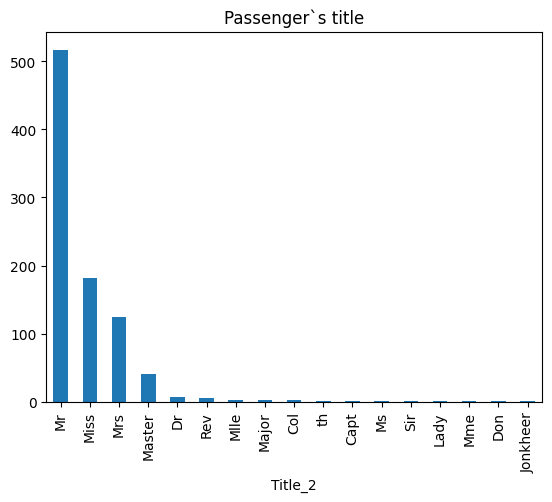

In [12]:
plot = titanic['Title_2'].value_counts().plot(kind='bar', title='Passenger`s title')

<ipython-input-13-13a7831f3c2e>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Title_2'].replace(['Ms', 'Mlle', 'Lady', 'Mme', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev', 'Mlle', 'th'  ],['Miss','Miss','Miss','Miss', 'Dr', 'Dr','Dr','Dr','Dr','Dr','Dr','Miss', 'Dr' ],inplace=True)


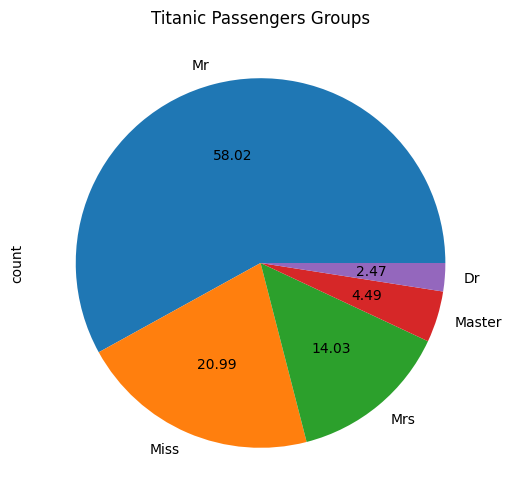

In [13]:
#We can replace the values as Lady as Miss. Also, we can group some titles as Capt as Dr:

titanic['Title_2'].replace(['Ms', 'Mlle', 'Lady', 'Mme', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev', 'Mlle', 'th'  ],['Miss','Miss','Miss','Miss', 'Dr', 'Dr','Dr','Dr','Dr','Dr','Dr','Miss', 'Dr' ],inplace=True)


plot = titanic['Title_2'].value_counts().plot(kind='pie', autopct='%.2f',
                                            figsize=(6, 6),
                                            title='Titanic Passengers Groups')

### One Hot Encoding

We implement this method to convert the categorical variables as  Sex and Embarked to numerical variables

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Hacer Make columns para One Hot Encoder
transformer = make_column_transformer(
    (OneHotEncoder(), ['Sex','Embarked']),
    remainder='drop')

transformed = transformer.fit_transform(titanic)
transformed

array([[0., 1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0.]])

In [15]:
transformer.get_feature_names_out()

array(['onehotencoder__Sex_female', 'onehotencoder__Sex_male',
       'onehotencoder__Embarked_C', 'onehotencoder__Embarked_Q',
       'onehotencoder__Embarked_S', 'onehotencoder__Embarked_nan'],
      dtype=object)

In [16]:
transformed_df = pd.DataFrame(
    transformed, #datos del dataframe
    columns=transformer.get_feature_names_out().tolist() # nombres de las columnas
)

##Mostrar info
transformed_df.head()

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Embarked_nan
0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0


In [17]:
lista = [transformed_df,titanic.drop(['Sex','Embarked'],axis=1)]

In [18]:
df_transformed= pd.concat(lista,axis=1)
df_transformed.head(3)

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Embarked_nan,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_1,Title_2
0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,Mr. Owen Harris,Mr
1,1.0,0.0,1.0,0.0,0.0,0.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,Mrs. John Bradley (Florence Briggs Thayer),Mrs
2,1.0,0.0,0.0,0.0,1.0,0.0,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,Miss. Laina,Miss


In [19]:
df_transformed

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Embarked_nan,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_1,Title_2
0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,Mr. Owen Harris,Mr
1,1.0,0.0,1.0,0.0,0.0,0.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,Mrs. John Bradley (Florence Briggs Thayer),Mrs
2,1.0,0.0,0.0,0.0,1.0,0.0,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,Miss. Laina,Miss
3,1.0,0.0,0.0,0.0,1.0,0.0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,Mrs. Jacques Heath (Lily May Peel),Mrs
4,0.0,1.0,0.0,0.0,1.0,0.0,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,Mr. William Henry,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,Rev. Juozas,Dr
887,1.0,0.0,0.0,0.0,1.0,0.0,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,Miss. Margaret Edith,Miss
888,1.0,0.0,0.0,0.0,1.0,0.0,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,"Miss. Catherine Helen ""Carrie""",Miss
889,0.0,1.0,1.0,0.0,0.0,0.0,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,Mr. Karl Howell,Mr


We use the Method Label Encoder for the Title_2 column

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_transformed['Numerical_Title'] = encoder.fit_transform(df_transformed['Title_2'])
df_transformed

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Embarked_nan,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_1,Title_2,Numerical_Title
0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,Mr. Owen Harris,Mr,3
1,1.0,0.0,1.0,0.0,0.0,0.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,Mrs. John Bradley (Florence Briggs Thayer),Mrs,4
2,1.0,0.0,0.0,0.0,1.0,0.0,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,Miss. Laina,Miss,2
3,1.0,0.0,0.0,0.0,1.0,0.0,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,Mrs. Jacques Heath (Lily May Peel),Mrs,4
4,0.0,1.0,0.0,0.0,1.0,0.0,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,Mr. William Henry,Mr,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,Rev. Juozas,Dr,0
887,1.0,0.0,0.0,0.0,1.0,0.0,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,Miss. Margaret Edith,Miss,2
888,1.0,0.0,0.0,0.0,1.0,0.0,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,"Miss. Catherine Helen ""Carrie""",Miss,2
889,0.0,1.0,1.0,0.0,0.0,0.0,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,Mr. Karl Howell,Mr,3


We also can create a new column called femaleMarried. Mrs is all the females that are married. Mrs has the value of 4 in the column of Numerical Title.

We can get this new column with the code below. We use 1 if fullfill the condition, else is 0

In [21]:
df_transformed['femaleMarried'] = 0
df_transformed['femaleMarried'].loc[df_transformed['Numerical_Title'] == 4] = 1

<ipython-input-21-022b0fabad8b>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_transformed['femaleMarried'].loc[df_transformed['Numerical_Title'] == 4] = 1
<ipython-input-21-022b0fabad8b>:2: SettingWithCopyWarning: 
A value is trying to

In [22]:
df_transformed.head(3)

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Embarked_nan,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_1,Title_2,Numerical_Title,femaleMarried
0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,Mr. Owen Harris,Mr,3,0
1,1.0,0.0,1.0,0.0,0.0,0.0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,Mrs. John Bradley (Florence Briggs Thayer),Mrs,4,1
2,1.0,0.0,0.0,0.0,1.0,0.0,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,Miss. Laina,Miss,2,0


In [23]:
 df_num = df_transformed.select_dtypes('number')
 df_num.head(3)

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Embarked_nan,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Numerical_Title,femaleMarried
0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,3,22.0,1,0,7.2500,3,0
1,1.0,0.0,1.0,0.0,0.0,0.0,2,1,1,38.0,1,0,71.2833,4,1
2,1.0,0.0,0.0,0.0,1.0,0.0,3,1,3,26.0,0,0,7.9250,2,0


### Ultima preparación

In [24]:
df_num.dropna(inplace = True)
X = df_num.drop('Survived',axis=1)
y = df_num['Survived']

In [25]:
X

,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Embarked_C,onehotencoder__Embarked_Q,onehotencoder__Embarked_S,onehotencoder__Embarked_nan,PassengerId,Pclass,Age,SibSp,Parch,Fare,Numerical_Title,femaleMarried
0,0.0,1.0,0.0,0.0,1.0,0.0,1,3,22.0,1,0,7.2500,3,0
1,1.0,0.0,1.0,0.0,0.0,0.0,2,1,38.0,1,0,71.2833,4,1
2,1.0,0.0,0.0,0.0,1.0,0.0,3,3,26.0,0,0,7.9250,2,0
3,1.0,0.0,0.0,0.0,1.0,0.0,4,1,35.0,1,0,53.1000,4,1
4,0.0,1.0,0.0,0.0,1.0,0.0,5,3,35.0,0,0,8.0500,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,1.0,0.0,0.0,1.0,0.0,0.0,886,3,39.0,0,5,29.1250,4,1
886,0.0,1.0,0.0,0.0,1.0,0.0,887,2,27.0,0,0,13.0000,0,0
887,1.0,0.0,0.0,0.0,1.0,0.0,888,1,19.0,0,0,30.0000,2,0
889,0.0,1.0,1.0,0.0,0.0,0.0,890,1,26.0,0,0,30.0000,3,0


In [26]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
885,0
886,0
887,1
889,1


## Step 3: Uso de algoritmos de ML de Clasificación (OJO le falta Backtesting)

### Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

clf = RandomForestClassifier(max_depth=2) #instanciar el objeto
clf.fit(X, y) # Ajuste con los datos de titanic
y_pred = clf.predict(X) #Predicción
print("Accuracy:",metrics.accuracy_score(y, y_pred))

Accuracy: 0.7815126050420168


In [29]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,

### KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

neigh = KNeighborsClassifier(n_neighbors=3) #instanciar el objeto
neigh.fit(X, y) # Ajuste con los datos de titanic
y_pred = neigh.predict(X) #Predicción
print("Accuracy:",metrics.accuracy_score(y, y_pred))

Accuracy: 0.7913165266106442


### Logit

In [32]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X, y)
y_pred = clf.predict(X)
print("Accuracy:",metrics.accuracy_score(y, y_pred))

Accuracy: 0.8081232492997199


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


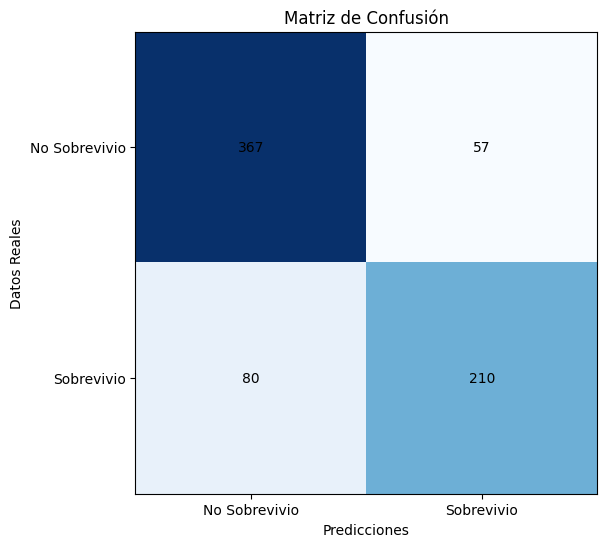

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Crear matriz de confusión
cm = confusion_matrix(y, y_pred)

# Etiquetas para la matriz de confusión
labels = ['No Sobrevivio', 'Sobrevivio']

# Crear figura y eje
fig, ax = plt.subplots(figsize=(8, 6))

# Mostrar matriz de confusión
ax.imshow(cm, interpolation='nearest', cmap='Blues')
ax.set_title('Matriz de Confusión')
ax.set_xlabel('Predicciones')
ax.set_ylabel('Datos Reales')
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

# Mostrar valores en la matriz
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()

Reto: Mejorar el Feature Engineering

Obtener ideas e implementarlos en el codigo
https://www.kaggle.com/code/gunesevitan/titanic-advanced-feature-engineering-tutorial
